## AppOrchid Assignment 

Objective: To classify if the car purchased at an auction is a good/bad buy - Classification problem 

In [399]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)

#### Data Cleaning

In [400]:
#reading traning.csv
df = pd.DataFrame(pd.read_csv('training.csv'))
print(df)

       RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  \

In [401]:
## Checking if the dataset is balanced or not
count_x = df['IsBadBuy'].value_counts()
print(count_x)

#This is an unbalanced dataset. Imbalanced data can hamper model accuracy. To avoid that, we will later use some resampling 
#techniques and see which one works best for our database.

0    64007
1     8976
Name: IsBadBuy, dtype: int64


In [402]:
#Get unique values of some of the categorical features

print('Unique values of the following feature columns \n')
print('Auction: ', df.Auction.unique(), '\n', df['Auction'].value_counts())
print('\n')
#print('Make: ', df.Make.unique(), '\n', df['Make'].value_counts()) 
#print('Model: ', df.Model.unique(), '\n', df['Model'].value_counts()) // High cardinality
#print('SubModel: ', df.SubModel.unique(), '\n', df['SubModel'].value_counts())
#print('Trim: ', df.SubModel.unique(), '\n', df['Trim'].value_counts())
print('Transmission: ', df.Transmission.unique(), '\n', df['Transmission'].value_counts())
print('\n')
print('WheelType: ', df.WheelType.unique(), '\n', df['WheelType'].value_counts())
print('\n')
print('Nationality: ', df.Nationality.unique(), '\n', df['Nationality'].value_counts())
print('\n')
print('Size: ', df.Size.unique(), '\n', df['Size'].value_counts())
print('\n')
print('TopThreeAmericanName: ', df.TopThreeAmericanName.unique(), '\n', df['TopThreeAmericanName'].value_counts())
print('\n')
print('PRIMEUNIT: ', df.PRIMEUNIT.unique(), '\n', df['PRIMEUNIT'].value_counts())
print('\n')
print('AUCGUART: ', df.AUCGUART.unique(), '\n', df['AUCGUART'].value_counts())
print('\n')
#print('VNZIP1: ', df.VNZIP1.unique(), '\n', df['VNZIP1'].value_counts())
#print('VNST: ', df.VNST.unique(), '\n', df['VNST'].value_counts())
#print('\n')
print('IsOnlineSale: ', df.IsOnlineSale.unique(), '\n', df['IsOnlineSale'].value_counts())
print('\n')

Unique values of the following feature columns 

Auction:  ['ADESA' 'OTHER' 'MANHEIM'] 
 MANHEIM    41043
OTHER      17501
ADESA      14439
Name: Auction, dtype: int64


Transmission:  ['AUTO' 'MANUAL' nan 'Manual'] 
 AUTO      70398
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64


WheelType:  ['Alloy' 'Covers' nan 'Special'] 
 Alloy      36050
Covers     33004
Special      755
Name: WheelType, dtype: int64


Nationality:  ['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER' nan] 
 AMERICAN          61028
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64


Size:  ['MEDIUM' 'LARGE TRUCK' 'COMPACT' 'LARGE' 'VAN' 'MEDIUM SUV' 'LARGE SUV'
 'SPECIALTY' 'SPORTS' 'CROSSOVER' 'SMALL SUV' 'SMALL TRUCK' nan] 
 MEDIUM         30785
LARGE           8850
MEDIUM SUV      8090
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2276
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUC

In [404]:
#print(df.describe())

In [403]:
#Imputate missing values or remove rows or columns if NaN values are significantly higher

print(df.isna().sum())

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [405]:
#Remove 'PRIMEUNIT' AND 'AUCGUART' from the database because around 95.3% cells are filled with Nan values
df=df.drop(['PRIMEUNIT','AUCGUART'],axis=1)

In [406]:
#Filling NaN values of WheelType and WheelTypeID
#'Alloy' is mapped to '1', 'Covers' to '2' and Special to '3'

Dict_WheelType = {'Alloy':1,'Covers':2,'Special':3}

# print('Number of elements which are null in WheelTypeID (before): ', df.WheelTypeID.isna().sum())
# df.WheelTypeID = df.WheelTypeID.fillna(df.WheelType.map(Dict_WheelType))
# print('Number of elements which are null in WheelTypeID (after): ', df.WheelTypeID.isna().sum()

#I already have WheelTypeID, so the categorical features: 'WheelType' is not required. Thus, removing it from the main dataframe
df=df.drop(['WheelType'],axis=1)

In [407]:
df2 = df[df['WheelTypeID'].isnull()]
print('Total Null values of WheelTypeID: ', len(df2.index))
df3 = df[~df.index.isin(df2.index)]

#print(len(df3.index))
df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size'])
#print(len(df4.index))

df5=df4[['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size','WheelTypeID_y']]
df5=df5.drop_duplicates(subset=['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size'])
#print(len(df5.index))

#print(df5)

Total Null values of WheelTypeID:  3169


In [408]:
#print(len(df.index))
df_x = pd.merge(df,df5, how='left', on=['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size'])
df_x.WheelTypeID.fillna(df_x.WheelTypeID_y, inplace=True)

print('Null values of WheelTypeID earlier: ', df.WheelTypeID.isna().sum())
print('Null values of WheelTypeID now: ', df_x.WheelTypeID.isna().sum())
df_x = df_x.drop(['WheelTypeID_y'],axis=1)
#print(len(df_x.index))
#print(df_x)

Null values of WheelTypeID earlier:  3169
Null values of WheelTypeID now:  97


In [409]:
df2 = df_x[df_x['WheelTypeID'].isnull()]
#print('Total Null values of WheelTypeID: ', len(df2.index))
df3 = df_x[~df_x.index.isin(df2.index)]

#print(len(df3.index))
df4 = pd.merge(df2,df3, how='left', on=['Make','Model'])
#print(len(df4.index))

df5=df4[['Make','Model','WheelTypeID_y']]
df5=df5.drop_duplicates(subset=['Make','Model'])
#print(len(df5.index))

df_y = pd.merge(df_x,df5, how='left', on=['Make','Model'])
df_y.WheelTypeID.fillna(df_y.WheelTypeID_y, inplace=True)

print('Null values of WheelTypeID earlier: ', df_x.WheelTypeID.isna().sum())
print('Null values of WheelTypeID now: ', df_y.WheelTypeID.isna().sum())
df_y = df_y.drop(['WheelTypeID_y'],axis=1)

Null values of WheelTypeID earlier:  97
Null values of WheelTypeID now:  7


In [410]:
#print(df_y.WheelTypeID.isna().sum())
#print(df_y)
df2 = df_y[df_y['WheelTypeID'].isnull()]
print(df2)

#Since '1' is the minority class, we shouldn't remove these rows.

       RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge      Make  \
9663    9672         1   3/17/2009  MANHEIM     2004           5  CADILLAC   
14463  14473         1   2/11/2009    OTHER     2006           3  CHRYSLER   
25908  25926         1   8/11/2010    OTHER     2001           9      JEEP   
41976  41999         1   6/24/2009    OTHER     2007           2       KIA   
48207  48231         1   8/19/2009    OTHER     2007           2  CADILLAC   
64213  64244         1   3/10/2010    ADESA     2002           8     ISUZU   
71458  71490         1  10/15/2009    ADESA     2007           2     MAZDA   

                      Model Trim                          SubModel  Color  \
9663   SRX AWD V8 4.6L V8 S  NaN                            4D SUV  BLACK   
14463  300C 5.7L V8 SFI / S    C                     4D SEDAN HEMI  GREEN   
25908       CHEROKEE 4WD 6C  Spo                    4D WAGON SPORT   BLUE   
41976   RONDO 4C 2.4L I4 DI   EX                          4D WAGON 

In [411]:
unique_Make_values_df2 = df2.Make.unique()
print(unique_Make_values_df2)

dict_a={}

df3 = df_y[df_y['WheelTypeID'].notna()]
for x in unique_Make_values_df2:
    df4 = df3[df3['Make']==str(x)]
    if len(df4.index)==0:
        print('empty')
        continue
    dict_a[x]=df4['WheelTypeID'].value_counts().idxmax()
    
    
print(dict_a)   
    

['CADILLAC' 'CHRYSLER' 'JEEP' 'KIA' 'ISUZU' 'MAZDA']
{'CADILLAC': 1.0, 'CHRYSLER': 2.0, 'JEEP': 1.0, 'KIA': 2.0, 'ISUZU': 1.0, 'MAZDA': 1.0}


In [412]:
#df_y.WheelTypeID.fillna(df_y.apply(lambda row: row['']))

print('Number of null values of WheelTypeID earlier: ', df_y.WheelTypeID.isna().sum())

# def function1(x):
#     return dict_a[x]

df_y['WheelTypeID'] = df_y.apply(
    lambda row: dict_a[row['Make']] if np.isnan(row['WheelTypeID']) else row['WheelTypeID'],
    axis=1
)

print('Number of null values of WheelTypeID now: ', df_y.WheelTypeID.isna().sum())

Number of null values of WheelTypeID earlier:  7
Number of null values of WheelTypeID now:  0


In [413]:
### Filling Nan values of SubModel

df2 = df_y[df_y['SubModel'].isnull()]
#print(df2)
df3 = df_y[~df_y.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','Trim'])
#print(df4)

df5=df4[['Make','Model','Trim','SubModel_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','Trim'])
print(df6)

           Make                 Model Trim         SubModel_y
0         DODGE  STRATUS V6 2.7L V6 M  SXT   4D SEDAN SXT FFV
1674  CHEVROLET  S10 PICKUP 2WD 4C 2.  Bas   REG CAB 2.2L FFV
1692  CHEVROLET    IMPALA 3.4L V6 SFI  Bas           4D SEDAN
2196    PONTIAC   GRAND AM V6 3.4L V6   SE       4D SEDAN SE1
2346  CHEVROLET   CAVALIER 4C 2.2L I4  Bas           2D COUPE
2585    MERCURY  MOUNTAINEER 2WD V8 4  NaN        4D SUV 4.6L
2592       FORD  FREESTAR FWD V6 3.9L   SE  PASSENGER 3.9L SE


In [414]:
db1 = pd.merge(df_y,df6, how='left', on=['Make','Model','Trim'])
print('Number of null values of SubModel earlier: ', db1.SubModel.isna().sum())
db1.SubModel.fillna(db1.SubModel_y, inplace=True)
print('Number of null values of SubModel now: ', db1.SubModel.isna().sum())
# print(df2[['Make','Model','Trim','SubModel']])
#print(db1)

Number of null values of SubModel earlier:  8
Number of null values of SubModel now:  0


In [415]:
db1 = db1.drop(['SubModel_y'],axis=1)
#print(db1)

In [416]:
## Filling Nan values of Trim 

df2 = db1[db1['Trim'].isnull()]
# # #print(df2)
df3 = db1[~db1.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Trim_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel'])
print(len(df6.index))

# Each trim levels has different features and higher trim levels offer more equipment

185


In [417]:
db2 = pd.merge(db1,df6, how='left', on=['Make','Model','SubModel'])
print('Number of null values of Trim earlier: ', db2.Trim.isna().sum())
db2.Trim.fillna(db2.Trim_y, inplace=True)
print('Number of null values of Trim now: ', db2.Trim.isna().sum())


Number of null values of Trim earlier:  2360
Number of null values of Trim now:  878


In [418]:
#Dropping 'Trim'
db2 = db2.drop(['Trim_y'],axis=1)

In [419]:
## Filling Nan values of Transmission feature
print(db2.Transmission.unique())

db2["Transmission"].replace({"Manual": "MANUAL"}, inplace=True)
print(db2.Transmission.unique())

['AUTO' 'MANUAL' nan 'Manual']
['AUTO' 'MANUAL' nan]


In [420]:
df2 = db2[db2['Transmission'].isnull()]
# # #print(df2)
df3 = db2[~db2.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Transmission_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel'])
print(len(df6.index))


8


In [421]:
db3 = pd.merge(db2,df6, how='left', on=['Make','Model','SubModel'])
print('Number of null values of Transmission earlier: ', db3.Transmission.isna().sum())
db3.Transmission.fillna(db3.Transmission_y, inplace=True)
print('Number of null values of Transmission now: ', db3.Transmission.isna().sum())


Number of null values of Transmission earlier:  9
Number of null values of Transmission now:  0


In [422]:
db3 = db3.drop(['Transmission_y'],axis=1)

In [423]:
## Fillin Nan values of Nationality

df2 = db3[db3['Nationality'].isnull()]
# # #print(df2)
df3 = db3[~db3.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Nationality_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel'])
print(len(df6.index))

4


In [424]:
db4 = pd.merge(db3,df6, how='left', on=['Make','Model','SubModel'])
print('Number of null values in Nationality earlier: ', db4.Nationality.isna().sum())
db4.Nationality.fillna(db4.Nationality_y, inplace=True)
print('Number of null values in Nationality now: ', db4.Nationality.isna().sum())

Number of null values in Nationality earlier:  5
Number of null values in Nationality now:  2


In [425]:
db4 = db4.drop(['Nationality_y'],axis=1)

In [426]:
df2 = db3[db3['Nationality'].isnull()]
# # #print(df2)
df3 = db3[~db3.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make'])
# #print(df4)

df5=df4[['Make','Nationality_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make'])
print(len(df6.index))

4


In [427]:
db5 = pd.merge(db4,df6, how='left', on=['Make'])
print('Number of null values in Nationality earlier: ', db5.Nationality.isna().sum())
db5.Nationality.fillna(db5.Nationality_y, inplace=True)
print('Number of null values in Nationality now: ', db5.Nationality.isna().sum())

Number of null values in Nationality earlier:  2
Number of null values in Nationality now:  0


In [428]:
db5=db5.drop(['Nationality_y'],axis=1)

In [429]:
## Filling Nan values of Size feature

df2 = db5[db5['Size'].isnull()]
# # #print(df2)
df3 = db5[~db5.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel','Trim'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Trim','Size_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel','Trim'])
print(len(df6.index))

4


In [430]:
db6 = pd.merge(db5,df6, how='left', on=['Make','Model','SubModel','Trim'])
print('Number of null values in Size earlier: ', db6.Size.isna().sum())
db6.Size.fillna(db6.Size_y, inplace=True)
print('Number of null values in Size now: ', db6.Size.isna().sum())

Number of null values in Size earlier:  5
Number of null values in Size now:  2


In [431]:
db6 = db6.drop(['Size_y'],axis=1)

In [432]:
df2 = db6[db6['Size'].isnull()]
# # #print(df2)
df3 = db6[~db6.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model'])
# #print(df4)

df5=df4[['Make','Model','Size_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model'])
print(len(df6.index))

db7 = pd.merge(db6,df6, how='left', on=['Make','Model'])
print('Number of null values in Size earlier: ', db7.Size.isna().sum())
db7.Size.fillna(db7.Size_y, inplace=True)
print('Number of null values in Size now: ', db7.Size.isna().sum())


2
Number of null values in Size earlier:  2
Number of null values in Size now:  1


In [433]:
db7 = db7.drop(['Size_y'],axis=1)

In [434]:
db7.Size.fillna('SMALL TRUCK', inplace=True) #GMC SIERRA 1500 BASE is a small truck

#df2 = db7[db7['Size'].isnull()]
#print(df2)
 
# df2 = db5[db5['Size'].isnull()]
# print(df2)

In [435]:
### Filling Nan values of TopThreeAmericanName

df2 = db7[db7['TopThreeAmericanName'].isnull()]
print(len(df2.index))
#print(df2)

df2.loc[df2['Nationality'] != 'AMERICAN', 'TopThreeAmericanName'] = 'OTHER'

df2.loc[df2['Make'] == 'DODGE', 'TopThreeAmericanName'] = 'CHRYSLER'
df2.loc[df2['Make'] == 'JEEP', 'TopThreeAmericanName'] = 'CHRYSLER'
df2.loc[df2['Make'] == 'GMC', 'TopThreeAmericanName'] = 'GM'


print(df2)


5
       RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge     Make  \
10888  10897         0  10/19/2009  MANHEIM     2002           7      GMC   
25169  25187         0  12/10/2009    OTHER     2008           1    DODGE   
37986  38009         0  10/23/2009  MANHEIM     2006           3  HYUNDAI   
69948  69980         0   2/17/2010    ADESA     2008           2     JEEP   
69958  69990         0   2/24/2010    ADESA     2008           2     JEEP   

                     Model Trim        SubModel   Color Transmission  \
10888          SIERRA 1500   SL            BASE   WHITE         AUTO   
25169         NITRO 4WD V6  SXT  4D SUV 3.7L SE   WHITE         AUTO   
37986  ELANTRA 2.0L I4 MPI  GLS        4D SEDAN  SILVER         AUTO   
69948       PATRIOT 2WD 4C  Spo    4D SUV SPORT  SILVER         AUTO   
69958       PATRIOT 2WD 4C  Spo    4D SUV SPORT   BLACK         AUTO   

       WheelTypeID  VehOdo  Nationality         Size TopThreeAmericanName  \
10888          2.0   7828

C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [436]:
print('Number of null values in TopThreeAmericanName earlier: ', db7.TopThreeAmericanName.isna().sum())
df3 = df2[['RefId','TopThreeAmericanName']]
db8 = pd.merge(db7,df3,how='left',on=['RefId'])
# print(db8)
db8.TopThreeAmericanName_x.fillna(db8.TopThreeAmericanName_y, inplace=True)
db8=db8.rename(columns = {'TopThreeAmericanName_x':'TopThreeAmericanName'})
db8=db8.drop(['TopThreeAmericanName_y'],axis=1)

print('Number of null values in TopThreeAmericanName now: ', db8.TopThreeAmericanName.isna().sum())

Number of null values in TopThreeAmericanName earlier:  5
Number of null values in TopThreeAmericanName now:  0


In [437]:
### Filling Nan values in MMRCurrent & MMR Acquisition

## Correlation between MMRCurrentAuctionAveragePrice & MMRAcquisitionAuctionAveragePrice
print('The correlation between MMRCurrentAuctionAveragePrice and MMRAcquisitionAuctionAveragePrice: ', db8['MMRCurrentAuctionAveragePrice'].corr(db8['MMRAcquisitionAuctionAveragePrice']))
print('The correlation between MMRCurrentAuctionCleanPrice and MMRAcquisitionAuctionCleanPrice: ', db8['MMRCurrentAuctionCleanPrice'].corr(db8['MMRAcquisitionAuctionCleanPrice']))
print('The correlation between MMRCurrentRetailAveragePrice and MMRAcquisitionRetailAveragePrice: ', db8['MMRCurrentRetailAveragePrice'].corr(db8['MMRAcquisitionRetailAveragePrice']))
print('The correlation between MMRCurrentRetailCleanPrice and MMRAcquisitonRetailCleanPrice: ', db8['MMRCurrentRetailCleanPrice'].corr(db8['MMRAcquisitonRetailCleanPrice']))

db8.corr(method ='pearson')


The correlation between MMRCurrentAuctionAveragePrice and MMRAcquisitionAuctionAveragePrice:  0.9378170527093805
The correlation between MMRCurrentAuctionCleanPrice and MMRAcquisitionAuctionCleanPrice:  0.9321137377075576
The correlation between MMRCurrentRetailAveragePrice and MMRAcquisitionRetailAveragePrice:  0.913108204261288
The correlation between MMRCurrentRetailCleanPrice and MMRAcquisitonRetailCleanPrice:  0.906810359545017


,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.012822,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.041371,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.260336,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.251101,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.012822,-0.041371,0.260336,-0.251101,1.000000,-0.212041,-0.095956,-0.129997,-0.072482,-0.101832,-0.089087,-0.121624,-0.074138,-0.102335,0.186134,0.009644,-0.162967,-0.005715,-0.134252
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.212041,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095956,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129997,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072482,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.101832,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


In [438]:
# There are 18 Null values in all MMRAcuisition features. Let's fill those first.

df2=db8[db8['MMRCurrentAuctionAveragePrice'].isnull() & db8['MMRCurrentAuctionCleanPrice'].isnull() & db8['MMRCurrentRetailAveragePrice'].isnull() & db8['MMRCurrentRetailCleanPrice'].isnull() & db8['MMRAcquisitionAuctionAveragePrice'].isnull() & db8['MMRAcquisitionAuctionCleanPrice'].isnull() & db8['MMRAcquisitionRetailAveragePrice'].isnull() & db8['MMRAcquisitonRetailCleanPrice'].isnull()]
print(len(df2.index))

df3 = db8[~db8.index.isin(df2.index)]
#print(df3)
df4_a = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice']]
# df4_b = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionCleanPrice']]
# df4_c = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitionRetailAveragePrice']]
# df4_d = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitonRetailCleanPrice']]

18


In [439]:
x_a = df4_a[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID']]
y_a = df4_a[['MMRAcquisitionAuctionAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size = 0.3)

model_a = LinearRegression()
model_a.fit(x_train,y_train)
# print(model_a.coef_)
prediction_a = model_a.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_a))
print(model_a.coef_)

MSE:  819.6899866413166
[[ 9.14555454e-01  2.66601983e-01 -5.75745888e+02  1.01593042e+02
  -3.96959024e+02]]


In [440]:
# model_a2 = svm.SVR()
# model_a2.fit(x_train,y_train)
# prediction_a2 = model_a2.predict(x_test)
# print('MSE: ', metrics.mean_absolute_error(y_test, prediction_a2))

# scaler = MinMaxScaler()
# scaled_train = scaler.fit_transform(x_train)
# scaled_test = scaler.transform(x_test)

# print(len(scaled_train))
# print(len(y_train))

# model_x = LinearRegression()
# model_x.fit(scaled_train,y_train)

# prediction_a = model_x.predict(scaled_test)
# print(metrics.mean_absolute_error(y_test, prediction_a))

In [441]:
## Filling Nan values of all MMRAcuisition features

model_a2 = LinearRegression()
model_a2.fit(x_a,y_a)

x_a2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID']]
y_a2 = df2[['MMRAcquisitionAuctionAveragePrice']]

prediction_a2 = model_a2.predict(x_a2)
# print(prediction_a2)

x_a2['MMRAcquisitionAuctionAveragePrice'] = prediction_a2
x_a2 = x_a2[['MMRAcquisitionAuctionAveragePrice']]

# print(x_a2)

print('Number of null values in MMRAcquisitionAuctionAveragePrice earlier: ', db8.MMRAcquisitionAuctionAveragePrice.isna().sum())
db9 = pd.merge(db8, x_a2, how='left',left_index=True,right_index=True)
# print(db9)

db9.MMRAcquisitionAuctionAveragePrice_x.fillna(db9.MMRAcquisitionAuctionAveragePrice_y, inplace=True)
db9=db9.rename(columns = {'MMRAcquisitionAuctionAveragePrice_x':'MMRAcquisitionAuctionAveragePrice'})
db9=db9.drop(['MMRAcquisitionAuctionAveragePrice_y'],axis=1)

print('Number of null values in MMRAcquisitionAuctionAveragePrice now: ', db9.MMRAcquisitionAuctionAveragePrice.isna().sum())

Number of null values in MMRAcquisitionAuctionAveragePrice earlier:  18
Number of null values in MMRAcquisitionAuctionAveragePrice now:  0


<ipython-input-441-c041bbef513d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a2['MMRAcquisitionAuctionAveragePrice'] = prediction_a2


In [442]:
### Similarily filling MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice & MMRAcquisitonRetailCleanPrice

df2=db9[db9['MMRAcquisitionAuctionCleanPrice'].isnull()]
# print(len(df2.index))

df3 = db9[~db9.index.isin(df2.index)]
# print(len(df3.index))

df4_b = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']]

x_b = df4_b[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice']]
y_b = df4_b[['MMRAcquisitionAuctionCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_b, y_b, test_size = 0.3)

model_b = LinearRegression()
model_b.fit(x_train,y_train)
# print(model_a.coef_)
prediction_b = model_b.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_b))
# print(model_a.coef_)


MSE:  258.85086634567915


In [443]:
## Filling Nan values of MMRAcquisitionAuctionCleanPrice feature

model_b2 = LinearRegression()
model_b2.fit(x_b,y_b)

x_b2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice']]
y_b2 = df2[['MMRAcquisitionAuctionCleanPrice']]

prediction_b2 = model_b2.predict(x_b2)
# print(prediction_a2)

x_b2['MMRAcquisitionAuctionCleanPrice'] = prediction_b2
x_b2 = x_b2[['MMRAcquisitionAuctionCleanPrice']]
# print(x_a2)

print('Number of null values in MMRAcquisitionAuctionCleanPrice earlier: ', db1.MMRAcquisitionAuctionCleanPrice.isna().sum())
db10 = pd.merge(db9, x_b2, how='left',left_index=True,right_index=True)
# print(db9)

db10.MMRAcquisitionAuctionCleanPrice_x.fillna(db10.MMRAcquisitionAuctionCleanPrice_y, inplace=True)
db10=db10.rename(columns = {'MMRAcquisitionAuctionCleanPrice_x':'MMRAcquisitionAuctionCleanPrice'})
db10=db10.drop(['MMRAcquisitionAuctionCleanPrice_y'],axis=1)

print('Number of null values in MMRAcquisitionAuctionCleanPrice now: ', db10.MMRAcquisitionAuctionCleanPrice.isna().sum())

Number of null values in MMRAcquisitionAuctionCleanPrice earlier:  18
Number of null values in MMRAcquisitionAuctionCleanPrice now:  0


<ipython-input-443-5c1d5eac73fe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_b2['MMRAcquisitionAuctionCleanPrice'] = prediction_b2


In [444]:
df2=db10[db10['MMRAcquisitionRetailAveragePrice'].isnull()]
print(len(df2.index))

df3 = db10[~db10.index.isin(df2.index)]
print(len(df3.index))

df4_c = df3[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice']]

x_c = df4_c[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']]
y_c = df4_c[['MMRAcquisitionRetailAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3)

model_c = LinearRegression()
model_c.fit(x_train,y_train)
# print(model_a.coef_)
prediction_c = model_c.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_c))
# print(model_a.coef_)


18
72965
MSE:  1191.7273263974357


In [445]:
## Filling Nan values of MMRAcquisitionRetailAveragePrice feature

model_c2 = LinearRegression()
model_c2.fit(x_c,y_c)

x_c2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']]
y_c2 = df2[['MMRAcquisitionRetailAveragePrice']]

prediction_c2 = model_c2.predict(x_c2)
# print(prediction_a2)

x_c2['MMRAcquisitionRetailAveragePrice'] = prediction_c2
x_c2 = x_c2[['MMRAcquisitionRetailAveragePrice']]

# # print(x_a2)

print('Number of null values in MMRAcquisitionRetailAveragePrice earlier: ', db10.MMRAcquisitionRetailAveragePrice.isna().sum())
db11 = pd.merge(db10, x_c2, how='left',left_index=True,right_index=True)
# # print(db9)

db11.MMRAcquisitionRetailAveragePrice_x.fillna(db11.MMRAcquisitionRetailAveragePrice_y, inplace=True)
db11=db11.rename(columns = {'MMRAcquisitionRetailAveragePrice_x':'MMRAcquisitionRetailAveragePrice'})
db11=db11.drop(['MMRAcquisitionRetailAveragePrice_y'],axis=1)

print('Number of null values in MMRAcquisitionRetailAveragePrice now: ', db11.MMRAcquisitionRetailAveragePrice.isna().sum())

Number of null values in MMRAcquisitionRetailAveragePrice earlier:  18
Number of null values in MMRAcquisitionRetailAveragePrice now:  0


<ipython-input-445-f63d9624a9ca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_c2['MMRAcquisitionRetailAveragePrice'] = prediction_c2


In [446]:
df2=db11[db11['MMRAcquisitonRetailCleanPrice'].isnull()]
print(len(df2.index))

df3 = db11[~db11.index.isin(df2.index)]
print(len(df3.index))

df4_d = df3[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice']]

x_d = df4_d[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice']]
y_d = df4_d[['MMRAcquisitonRetailCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_d, y_d, test_size = 0.3)

model_d = LinearRegression()
model_d.fit(x_train,y_train)
# print(model_a.coef_)
prediction_d = model_d.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_d))
# print(model_a.coef_)


18
72965
MSE:  149.2660552946655


In [447]:
## Filling Nan values of MMRAcquisitonRetailCleanPrice feature

model_d2 = LinearRegression()
model_d2.fit(x_d,y_d)

x_d2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice']]
y_d2 = df2[['MMRAcquisitonRetailCleanPrice']]

prediction_d2 = model_d2.predict(x_d2)
# print(prediction_a2)

x_d2['MMRAcquisitonRetailCleanPrice'] = prediction_d2
x_d2 = x_d2[['MMRAcquisitonRetailCleanPrice']]

# # print(x_a2)

print('Number of null values in MMRAcquisitonRetailCleanPrice earlier: ', db11.MMRAcquisitonRetailCleanPrice.isna().sum())
db12 = pd.merge(db11, x_d2, how='left',left_index=True,right_index=True)
# # print(db9)

db12.MMRAcquisitonRetailCleanPrice_x.fillna(db12.MMRAcquisitonRetailCleanPrice_y, inplace=True)
db12=db12.rename(columns = {'MMRAcquisitonRetailCleanPrice_x':'MMRAcquisitonRetailCleanPrice'})
db12=db12.drop(['MMRAcquisitonRetailCleanPrice_y'],axis=1)

print('Number of null values in MMRAcquisitonRetailCleanPrice now: ', db12.MMRAcquisitonRetailCleanPrice.isna().sum())

Number of null values in MMRAcquisitonRetailCleanPrice earlier:  18
Number of null values in MMRAcquisitonRetailCleanPrice now:  0


<ipython-input-447-59ad1bda8328>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_d2['MMRAcquisitonRetailCleanPrice'] = prediction_d2


In [448]:
### Similarily filling Nan values of MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice & MMRCurrentRetailCleanPrice

df2=db12[db12['MMRCurrentAuctionAveragePrice'].isnull()]
print(len(df2.index))

df3 = db12[~db12.index.isin(df2.index)]
print(len(df3.index))

df4_a = df3[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionAuctionAveragePrice','MMRCurrentAuctionAveragePrice']]

x_a = df4_a[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionAuctionAveragePrice']]
y_a = df4_a[['MMRCurrentAuctionAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size = 0.3)

model_a = LinearRegression()
model_a.fit(x_train,y_train)
# print(model_a.coef_)
prediction_a = model_a.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_a))
# print(model_a.coef_)


315
72668
MSE:  505.1028693273258


In [449]:
## Filling Nan values of MMRCurrentAuctionAveragePrice feature

model_a2 = LinearRegression()
model_a2.fit(x_a,y_a)

x_a2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionAuctionAveragePrice']]
y_a2 = df2[['MMRCurrentAuctionAveragePrice']]

prediction_a2 = model_a2.predict(x_a2)
# print(prediction_a2)

x_a2['MMRCurrentAuctionAveragePrice'] = prediction_a2
x_a2 = x_a2[['MMRCurrentAuctionAveragePrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentAuctionAveragePrice earlier: ', db12.MMRCurrentAuctionAveragePrice.isna().sum())
db13 = pd.merge(db12, x_a2, how='left',left_index=True,right_index=True)
# # print(db9)

db13.MMRCurrentAuctionAveragePrice_x.fillna(db13.MMRCurrentAuctionAveragePrice_y, inplace=True)
db13=db13.rename(columns = {'MMRCurrentAuctionAveragePrice_x':'MMRCurrentAuctionAveragePrice'})
db13=db13.drop(['MMRCurrentAuctionAveragePrice_y'],axis=1)

print('Number of null values in MMRCurrentAuctionAveragePrice now: ', db13.MMRCurrentAuctionAveragePrice.isna().sum())

Number of null values in MMRCurrentAuctionAveragePrice earlier:  315
Number of null values in MMRCurrentAuctionAveragePrice now:  0


<ipython-input-449-7f6d7627ea38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a2['MMRCurrentAuctionAveragePrice'] = prediction_a2


In [450]:
df2=db13[db13['MMRCurrentAuctionCleanPrice'].isnull()]
print(len(df2.index))

df3 = db13[~db13.index.isin(df2.index)]
print(len(df3.index))

df4_b = df3[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionAuctionCleanPrice','MMRCurrentAuctionCleanPrice']]

x_b = df4_b[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionAuctionCleanPrice']]
y_b = df4_b[['MMRCurrentAuctionCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_b, y_b, test_size = 0.3)

model_b = LinearRegression()
model_b.fit(x_train,y_train)
# print(model_a.coef_)
prediction_b = model_b.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_b))
# print(model_a.coef_)


315
72668
MSE:  569.8777125315072


In [451]:
## Filling Nan values of MMRCurrentAuctionCleanPrice feature

model_b2 = LinearRegression()
model_b2.fit(x_b,y_b)

x_b2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionAuctionCleanPrice']]
y_b2 = df2[['MMRCurrentAuctionCleanPrice']]

prediction_b2 = model_b2.predict(x_b2)
# print(prediction_a2)

x_b2['MMRCurrentAuctionCleanPrice'] = prediction_b2
x_b2 = x_b2[['MMRCurrentAuctionCleanPrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentAuctionCleanPrice earlier: ', db13.MMRCurrentAuctionCleanPrice.isna().sum())
db14 = pd.merge(db13, x_b2, how='left',left_index=True,right_index=True)
# # print(db9)

db14.MMRCurrentAuctionCleanPrice_x.fillna(db14.MMRCurrentAuctionCleanPrice_y, inplace=True)
db14=db14.rename(columns = {'MMRCurrentAuctionCleanPrice_x':'MMRCurrentAuctionCleanPrice'})
db14=db14.drop(['MMRCurrentAuctionCleanPrice_y'],axis=1)

print('Number of null values in MMRCurrentAuctionCleanPrice now: ', db14.MMRCurrentAuctionCleanPrice.isna().sum())

Number of null values in MMRCurrentAuctionCleanPrice earlier:  315
Number of null values in MMRCurrentAuctionCleanPrice now:  0


<ipython-input-451-46e057b21917>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_b2['MMRCurrentAuctionCleanPrice'] = prediction_b2


In [452]:
df2=db14[db14['MMRCurrentRetailAveragePrice'].isnull()]
print(len(df2.index))

df3 = db14[~db14.index.isin(df2.index)]
print(len(df3.index))

df4_c = df3[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionRetailAveragePrice','MMRCurrentRetailAveragePrice']]

x_c = df4_c[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionRetailAveragePrice']]
y_c = df4_c[['MMRCurrentRetailAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3)

model_c = LinearRegression()
model_c.fit(x_train,y_train)
# print(model_a.coef_)
prediction_c = model_c.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_c))
# print(model_a.coef_)


315
72668
MSE:  785.4069587337415


In [453]:
## Filling Nan values of MMRCurrentRetailAveragePrice feature

model_c2 = LinearRegression()
model_c2.fit(x_c,y_c)

x_c2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitionRetailAveragePrice']]
y_c2 = df2[['MMRCurrentRetailAveragePrice']]

prediction_c2 = model_c2.predict(x_c2)
# print(prediction_a2)

x_c2['MMRCurrentRetailAveragePrice'] = prediction_c2
x_c2 = x_c2[['MMRCurrentRetailAveragePrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentRetailAveragePrice earlier: ', db14.MMRCurrentRetailAveragePrice.isna().sum())
db15 = pd.merge(db14, x_c2, how='left',left_index=True,right_index=True)
# # print(db9)

db15.MMRCurrentRetailAveragePrice_x.fillna(db15.MMRCurrentRetailAveragePrice_y, inplace=True)
db15=db15.rename(columns = {'MMRCurrentRetailAveragePrice_x':'MMRCurrentRetailAveragePrice'})
db15=db15.drop(['MMRCurrentRetailAveragePrice_y'],axis=1)

print('Number of null values in MMRCurrentRetailAveragePrice now: ', db15.MMRCurrentRetailAveragePrice.isna().sum())

Number of null values in MMRCurrentRetailAveragePrice earlier:  315
Number of null values in MMRCurrentRetailAveragePrice now:  0


<ipython-input-453-0f329dc59703>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_c2['MMRCurrentRetailAveragePrice'] = prediction_c2


In [454]:
df2=db15[db15['MMRCurrentRetailCleanPrice'].isnull()]
print(len(df2.index))

df3 = db15[~db15.index.isin(df2.index)]
print(len(df3.index))

df4_d = df3[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitonRetailCleanPrice','MMRCurrentRetailCleanPrice']]

x_d = df4_d[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitonRetailCleanPrice']]
y_d = df4_d[['MMRCurrentRetailCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_d, y_d, test_size = 0.3)

model_d = LinearRegression()
model_d.fit(x_train,y_train)
# print(model_a.coef_)
prediction_d = model_d.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_d))
# print(model_a.coef_)


315
72668
MSE:  871.6760437368703


In [455]:
## Filling Nan values of MMRCurrentRetailCleanPrice feature

model_d2 = LinearRegression()
model_d2.fit(x_d,y_d)

x_d2 = df2[['VehBCost','WarrantyCost','VehicleAge','IsBadBuy','MMRAcquisitonRetailCleanPrice']]
y_d2 = df2[['MMRCurrentRetailCleanPrice']]

prediction_d2 = model_d2.predict(x_d2)
# print(prediction_a2)

x_d2['MMRCurrentRetailCleanPrice'] = prediction_d2
x_d2 = x_d2[['MMRCurrentRetailCleanPrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentRetailCleanPrice earlier: ', db15.MMRCurrentRetailCleanPrice.isna().sum())
db16 = pd.merge(db15, x_d2, how='left',left_index=True,right_index=True)
# # print(db9)

db16.MMRCurrentRetailCleanPrice_x.fillna(db16.MMRCurrentRetailCleanPrice_y, inplace=True)
db16=db16.rename(columns = {'MMRCurrentRetailCleanPrice_x':'MMRCurrentRetailCleanPrice'})
db16=db16.drop(['MMRCurrentRetailCleanPrice_y'],axis=1)

print('Number of null values in MMRCurrentRetailCleanPrice now: ', db16.MMRCurrentRetailCleanPrice.isna().sum())

Number of null values in MMRCurrentRetailCleanPrice earlier:  315
Number of null values in MMRCurrentRetailCleanPrice now:  0


<ipython-input-455-b98fc2dba6a7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_d2['MMRCurrentRetailCleanPrice'] = prediction_d2


In [456]:
db = db16.copy()


['RED' 'WHITE' 'MAROON' 'SILVER' 'BLACK' 'GOLD' 'GREY' 'BLUE' 'BEIGE'
 'PURPLE' 'ORANGE' 'GREEN' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' nan]
Number of null values in Color earlier:  8
Number of null values in Color now:  0


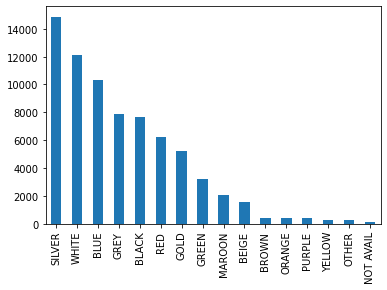

In [457]:
# print(db.Color.unique())

unique_values_Color = db.Color.unique()
print(unique_values_Color) #since it has more than one unique element, we can't simply remove this feature
count = db['Color'].value_counts()
# print(count)

fig, ax = plt.subplots()
db['Color'].value_counts().plot(ax=ax, kind='bar')

print('Number of null values in Color earlier: ', db.Color.isna().sum())

# db['Color'] = db['Color'].fillna(np.random.choice(db['Color'].values.tolist()))
unique_values_Color = unique_values_Color[:-1]

db['Color'] = db['Color'].fillna(pd.Series(np.random.choice(unique_values_Color, size=len(db.index))))
print('Number of null values in Color now: ', db.Color.isna().sum())


# df2 = db.groupby('Color')['IsBadBuy'].sum()
# df3 = db.groupby('Color')['RefId'].count()

# df4 = pd.merge(df2, df3, left_index=True, right_index=True)
# df4.columns = ['Number_of_bad_buy','Total_buy']

# df4['Percentage_of_bad_buy'] = (df4['Number_of_bad_buy']/df4['Total_buy'])*100


In [458]:
print(db.isna().sum())

## Still need to fill Nan values for 'Trim' features

RefId                                  0
IsBadBuy                               0
PurchDate                              0
Auction                                0
VehYear                                0
VehicleAge                             0
Make                                   0
Model                                  0
Trim                                 878
SubModel                               0
Color                                  0
Transmission                           0
WheelTypeID                            0
VehOdo                                 0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
MMRAcquisitionAuctionAveragePrice      0
MMRAcquisitionAuctionCleanPrice        0
MMRAcquisitionRetailAveragePrice       0
MMRAcquisitonRetailCleanPrice          0
MMRCurrentAuctionAveragePrice          0
MMRCurrentAuctionCleanPrice            0
MMRCurrentRetailAveragePrice           0
MMRCurrentRetail

In [459]:
## Will be removing Trim from the dataframe because there are so many Nan values such that we can't rendomly put anything else 
#and since this is a categorical feature, I would need to use a numeric feature in correspondence with it.

db = db.drop(['Trim'],axis=1)

db.to_csv('cleanedData_training.csv')